# **Proyecto 1: Parte final (Core)**

# **Proyecto 1:** Análisis y Predicción de Ventas en una Tienda de Retail

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.

<font color="tomato">**Observación: EDA realizado en archivo DEA_CORE5.ipynb**</font>

In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/shopping_trends_limpio.csv"
df= pd.read_csv(path)

# Modelos de Clasificación para predecir si un cliente utilizará un código promocional (promo_code_used) a partir de datos de comportamiento y características demográficas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3900 non-null   int64  
 1   gender                    3900 non-null   object 
 2   item_purchased            3900 non-null   object 
 3   category                  3900 non-null   object 
 4   purchase_amount_(usd)     3900 non-null   int64  
 5   location                  3900 non-null   object 
 6   size                      3900 non-null   object 
 7   color                     3900 non-null   object 
 8   season                    3900 non-null   object 
 9   review_rating             3900 non-null   float64
 10  subscription_status       3900 non-null   object 
 11  payment_method            3900 non-null   object 
 12  shipping_type             3900 non-null   object 
 13  promo_code_used           3900 non-null   object 
 14  previous

In [ ]:
df.head()

,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually


In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
age,3900.0,44.0,15.0,18.0,31.0,44.0,57.0,70.0
purchase_amount_(usd),3900.0,60.0,24.0,20.0,39.0,60.0,81.0,100.0
review_rating,3900.0,4.0,1.0,2.0,3.0,4.0,4.0,5.0
previous_purchases,3900.0,25.0,14.0,1.0,13.0,25.0,38.0,50.0


In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# **Split : features y target**

In [ ]:
X=df.drop(columns='promo_code_used')
y=df['promo_code_used']

In [ ]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3900 non-null   int64  
 1   gender                    3900 non-null   object 
 2   item_purchased            3900 non-null   object 
 3   category                  3900 non-null   object 
 4   purchase_amount_(usd)     3900 non-null   int64  
 5   location                  3900 non-null   object 
 6   size                      3900 non-null   object 
 7   color                     3900 non-null   object 
 8   season                    3900 non-null   object 
 9   review_rating             3900 non-null   float64
 10  subscription_status       3900 non-null   object 
 11  payment_method            3900 non-null   object 
 12  shipping_type             3900 non-null   object 
 13  promo_code_used           3900 non-null   object 
 14  previous

In [ ]:
df.head()

,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually


In [ ]:
# Definir variables.
num_cols = ["age","purchase_amount_(usd)","review_rating","previous_purchases"]
num_ord = ['size']
nom_cols = ["gender","item_purchased","category","location","color","season","subscription_status","payment_method","shipping_type","preferred_payment_method","frequency_of_purchases"]

In [ ]:
df['size'].value_counts()

,count
size,
M,1755
L,1053
S,663
XL,429


#▶ **Algoritmo Regresión Logística**

In [ ]:
preprocessorRL = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("ord", OrdinalEncoder(categories=[["S", "M", "L","XL"]]), num_ord),
        ("nom", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nom_cols)
    ]
)

In [ ]:
pipelineRL = Pipeline(steps=[
    ("preprocessing", preprocessorRL),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [ ]:
# Entrenar modelo
pipelineRL.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'purchase_amount_(usd)',
                                                   'review_rating',
                                                   'previous_purchases']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['S',
                                                                              'M',
                                                                              'L',
                                                                              'XL']]),
                                                  ['size']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'item_purchased',
                                                   'category', 'location',
                                                   'color', 'season',
                                                   'subscription_status',
                                                   'payment_method',
                                                   'shipping_type',
                                                   'preferred_payment_method',
                                                   'frequency_of_purchases'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipelineRL.predict(X_test)

In [ ]:
accuracyRL = accuracy_score(y_test, y_pred)
accuracyRL

0.8012820512820513

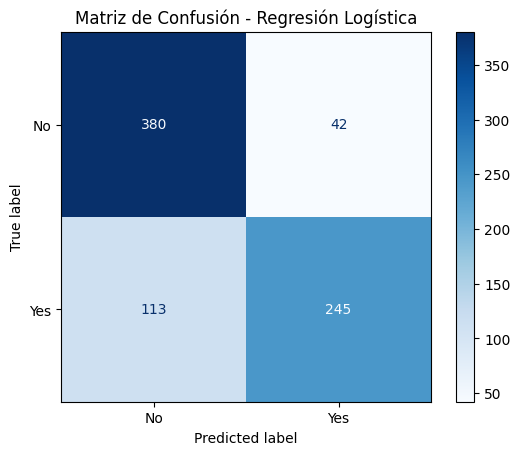

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelineRL.named_steps["classifier"].classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

El modelo Regresión Logística predice :
1. Correctamente 380 casos No, fallando en 42
2. Correctamente 245 casos si, fallando en 113

In [349]:
path="/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/matriz_confusion_regresion_logistica.png"
plt.savefig(path)


<Figure size 640x480 with 0 Axes>

**Algoritmo de Clasificación con Árbol de decisión**

In [ ]:
# Preprocesador.
preprocessor_tree = ColumnTransformer(transformers=[
   ("num", "passthrough", num_cols),
   ("ord", OrdinalEncoder(categories=[["S", "M", "L","XL"]]), num_ord),
   ("nom", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nom_cols)
])

# Modelo.
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor_tree),
    ("model", DecisionTreeClassifier(random_state=42))
])

In [ ]:
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age',
                                                   'purchase_amount_(usd)',
                                                   'review_rating',
                                                   'previous_purchases']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['S',
                                                                              'M',
                                                                              'L',
                                                                              'XL']]),
                                                  ['size']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'item_purchased',
                                                   'category', 'location',
                                                   'color', 'season',
                                                   'subscription_status',
                                                   'payment_method',
                                                   'shipping_type',
                                                   'preferred_payment_method',
                                                   'frequency_of_purchases'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Prediccion.
y_pred_tree = pipeline_tree.predict(X_test)

In [ ]:
accuracyArbol = accuracy_score(y_test, y_pred_tree)
accuracyArbol

0.7923076923076923

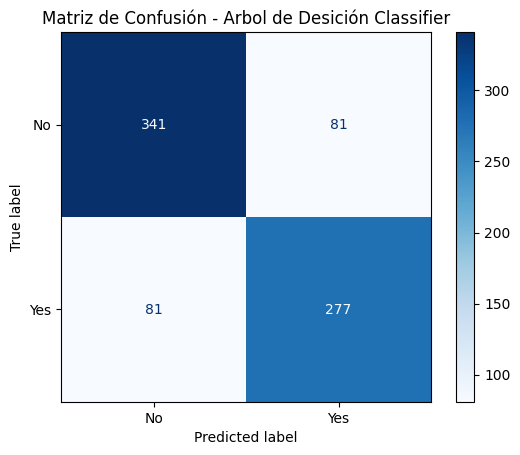

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelineRL.named_steps["classifier"].classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Arbol de Desición Classifier")
plt.show()

El modelo áebol de Decisión de Clasificación predice :
1. Correctamente 341 casos No, fallando en 81
2. Correctamente 277 casos si, fallando en 81

In [350]:
path="/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/matriz_confusion_arbol_classifier.png"
plt.savefig(path)

<Figure size 640x480 with 0 Axes>

**Algoritmo de Clasificación con KNN**

In [ ]:
# Preprocesador.

preprocessor_knn = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("ord", OrdinalEncoder(categories=[["S", "M", "L","XL"]]), num_ord),
        ("nom", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nom_cols)
    ]
)


# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=3))
])

In [ ]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'purchase_amount_(usd)',
                                                   'review_rating',
                                                   'previous_purchases']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['S',
                                                                              'M',
                                                                              'L',
                                                                              'XL']]),
                                                  ['size']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'item_purchased',
                                                   'category', 'location',
                                                   'color', 'season',
                                                   'subscription_status',
                                                   'payment_method',
                                                   'shipping_type',
                                                   'preferred_payment_method',
                                                   'frequency_of_purchases'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
accuracyknn = accuracy_score(y_test, y_pred_tree)
accuracyknn

0.7923076923076923

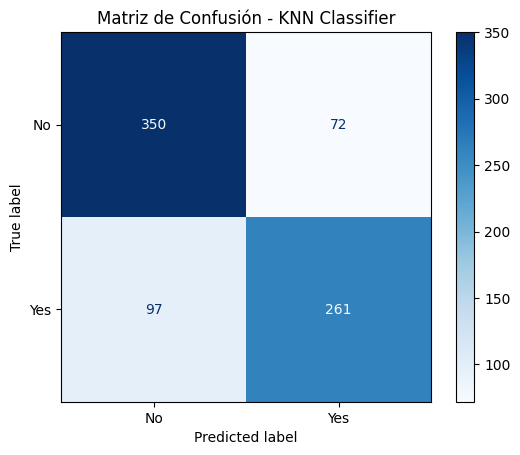

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelineRL.named_steps["classifier"].classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN Classifier")
plt.show()

El modelo KNN Classifier predice :
1. Correctamente 350 casos No, fallando en 72
2. Correctamente 261 casos si, fallando en 97

In [351]:
path="/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/matriz_confusion_KNNClassifier.png"
plt.savefig(path)

<Figure size 640x480 with 0 Axes>

**Algoritmo de clasificación  con Random Forest**

In [ ]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
       ("num", "passthrough", num_cols),
        ("ord", OrdinalEncoder(categories=[["S", "M", "L","XL"]]), num_ord),
        ("nom", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nom_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("preprocessing", preprocessor_forest),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age',
                                                   'purchase_amount_(usd)',
                                                   'review_rating',
                                                   'previous_purchases']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['S',
                                                                              'M',
                                                                              'L',
                                                                              'XL']]),
                                                  ['size']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'item_purchased',
                                                   'category', 'location',
                                                   'color', 'season',
                                                   'subscription_status',
                                                   'payment_method',
                                                   'shipping_type',
                                                   'preferred_payment_method',
                                                   'frequency_of_purchases'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

In [ ]:
accuracyforest = accuracy_score(y_test, y_pred_forest)
accuracyforest

0.8115384615384615

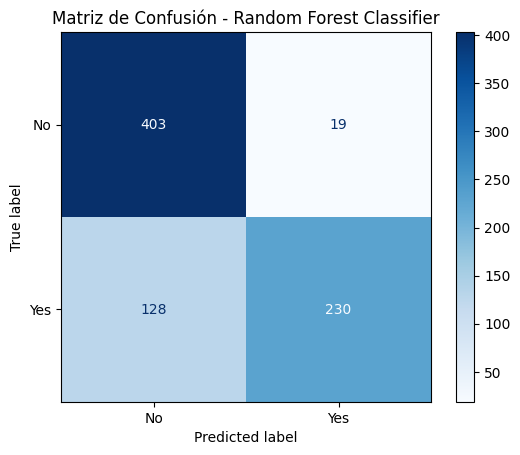

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_forest)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelineRL.named_steps["classifier"].classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest Classifier")
plt.show()

El modelo Random Forest predice :
1. Correctamente 403 casos No, fallando en 19
2. Correctamente 230 casos si, fallando en 128

In [352]:
path="/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/matriz_confusion_randomforestclassifier.png"
plt.savefig(path)

<Figure size 640x480 with 0 Axes>

# **Mejor modelo Random Forest --> Exportar modelo**

In [ ]:
import joblib
path="/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/mmodelo_RFCore5.pkl"
joblib.dump(pipeline_forest, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/core 5/mmodelo_RFCore5.pkl']

# **Análisis Comparativo**
1. Mejor rendimiento: **Random Forest**, con un accuracy del 81.15%, mostrando una buena capacidad de generalización sin sobreajuste.

2. Regresión Logística también logró un rendimiento competitivo (80.13%) con interpretabilidad de coeficientes como ventaja.

3. Árbol de Decisión y KNN alcanzaron el mismo resultado (79.23%), aunque el árbol tiene riesgo de sobreajuste si no se regula su profundidad.

**Observaciones Clave**

1. Se detectó data leakage entre las variables discount_applied y promo_code_used, por lo que se eliminó discount_applied del conjunto de entrenamiento.

2. Se utilizó preprocesamiento con OneHotEncoding y OrdinalEncoding para tratar variables categóricas y ordinales.

3. El dataset estaba equilibrado, lo que valida el uso de accuracy como métrica principal.